In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df1 = df.copy()
df1.drop(['class', 'embark_town', 'alive'], axis=1, inplace=True)
df1.deck = df1.deck.astype('O')
df1.deck.fillna('N', inplace=True)
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.median(), inplace=True)

In [2]:
le_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
le_columns

Index(['sex', 'embarked', 'who', 'adult_male', 'deck', 'alone'], dtype='object')

In [3]:
for i in le_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])

In [4]:
X = df1.drop('fare', axis=1)
y = df1.fare

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
dtreg = DecisionTreeRegressor(ccp_alpha=0.95, max_depth=5) # "mse", "friedman_mse", "mae"
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.95, max_depth=5)

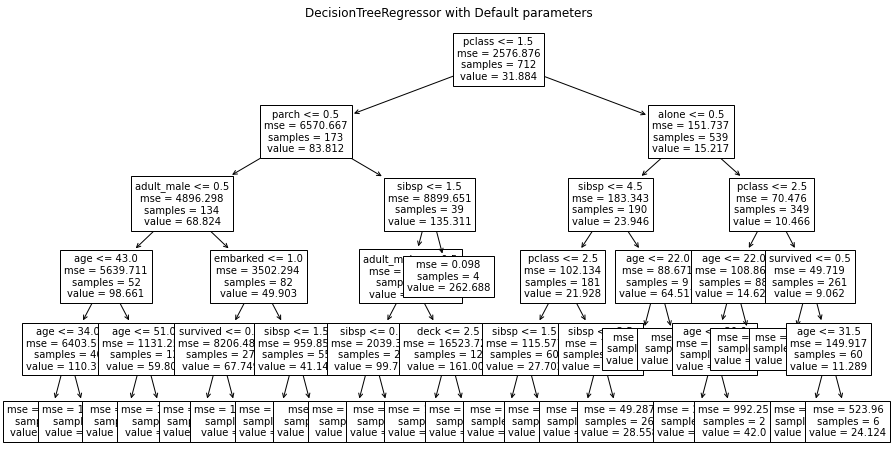

In [6]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

plot_tree(dtreg, feature_names=X_train.columns, fontsize=10, ax=ax1)
ax1.set_title('DecisionTreeRegressor with Default parameters')
plt.show()

In [9]:
dtreg.get_params()

{'ccp_alpha': 0.95,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [10]:
fare_pred = dtreg.predict(X_test)
fare_pred

array([  8.39698955,  13.17364865, 262.6875    ,  16.46684526,
        16.46684526,  13.17364865,  16.46684526,   8.39698955,
        73.92234545,   8.39698955,  39.42839444,  26.00696909,
        26.00696909,  39.42839444,  16.46684526,  26.00696909,
        39.42839444,   8.39698955,  46.35      ,  39.42839444,
         8.39698955,   8.39698955,  13.17364865,  13.17364865,
         8.39698955, 202.0890625 ,  39.42839444,  26.00696909,
         8.39698955,   8.39698955,  16.46684526, 155.77221667,
        26.00696909,  73.92234545,  78.825     ,  78.825     ,
        16.46684526,   8.39698955,  39.42839444,  26.00696909,
        28.55833846,   8.39698955,  30.490625  ,  13.17364865,
         9.86242593,   8.39698955,  16.46684526,  26.00696909,
        16.46684526,  16.46684526,  13.17364865,  49.11695714,
         8.39698955,   8.39698955,  16.46684526,   8.39698955,
        49.11695714,   8.39698955,  73.92234545,  16.46684526,
        46.35      ,  28.55833846,   8.39698955,   8.39

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, fare_pred)

1302.9215244136494

## Trade-off

Feature importanes:
[0.009 0.55  0.    0.059 0.103 0.118 0.011 0.    0.093 0.036 0.02 ]
survived : 0.009
pclass : 0.550
sex : 0.000
age : 0.059
sibsp : 0.103
parch : 0.118
embarked : 0.011
who : 0.000
adult_male : 0.093
deck : 0.036
alone : 0.020


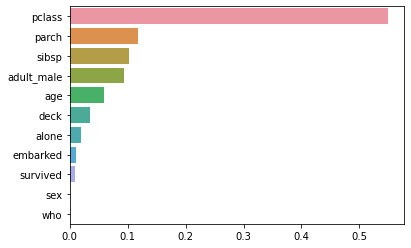

In [12]:
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# feature importance 추출
print("Feature importanes:\n{0}".format(np.round(dtreg.feature_importances_, 3)))

# feature별 importance 매핑
f_i1 = {}
f_i2 = {}

for name, value in zip(X_train.columns, dtreg.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    f_i1[name] = value

result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)

for i, j in result1:
    f_i2[i] = j
    
# feature importance를 column 별로 시각화하기
sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()))
plt.show()